In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip "/content/drive/MyDrive/Dataset.zip" -d "/content/drive/My Drive/"

In [ ]:
TRAIN_PATH = "/content/drive/My Drive/Dataset/Train"
VAL_PATH = "/content/drive/My Drive/Dataset/Test"


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.layers import *
from keras.models import *
from keras.preprocessing import image

In [ ]:
model = Sequential()
model.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(224,224,3)))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))


model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))


model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))


model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid'))


model.compile(loss=keras.losses.binary_crossentropy,optimizer='adam',metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 32)      896       
                                                                 
 conv2d_5 (Conv2D)           (None, 220, 220, 64)      18496     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 110, 110, 64)      0         
 g2D)                                                            
                                                                 
 dropout_4 (Dropout)         (None, 110, 110, 64)      0         
                                                                 
 conv2d_6 (Conv2D)           (None, 108, 108, 64)      36928     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 54, 54, 64)        0         
 g2D)                                                 

In [ ]:
train_datagen = image.ImageDataGenerator(
rescale = 1./255,
shear_range = 0.2,
zoom_range = 0.2,
horizontal_flip = True,
)


test_dataset = image.ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
'/content/drive/My Drive/Dataset/Train',
target_size = (224,224),
batch_size = 32,
class_mode = 'binary')


Found 224 images belonging to 2 classes.


In [ ]:
import os

In [ ]:
path='/content/drive/My Drive/Dataset/Train'
classes = os.listdir(path)
classes

['.DS_Store', 'cancer', 'normal lung tissue']

In [ ]:
train_generator.class_indices

{'cancer': 0, 'normal lung tissue': 1}

In [ ]:
validation_generator = test_dataset.flow_from_directory(
'/content/drive/My Drive/Dataset/Val',
target_size = (224,224),
batch_size = 32,
class_mode = 'binary')


Found 60 images belonging to 2 classes.


In [ ]:
hist = model.fit_generator(
train_generator,
steps_per_epoch=7,
epochs = 10,
validation_data = validation_generator,
validation_steps=2
)

<ipython-input-14-efe640429722>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  hist = model.fit_generator(


Epoch 1/10
7/7 [==============================] - 115s 16s/step - loss: 0.9441 - accuracy: 0.4911 - val_loss: 0.6913 - val_accuracy: 0.5000
Epoch 2/10
7/7 [==============================] - 49s 7s/step - loss: 0.6802 - accuracy: 0.5625 - val_loss: 0.6594 - val_accuracy: 0.8667
Epoch 3/10
7/7 [==============================] - 49s 7s/step - loss: 0.5252 - accuracy: 0.7723 - val_loss: 0.4713 - val_accuracy: 0.8667
Epoch 4/10
7/7 [==============================] - 49s 7s/step - loss: 0.4442 - accuracy: 0.7857 - val_loss: 0.4558 - val_accuracy: 0.9667
Epoch 5/10
7/7 [==============================] - 47s 7s/step - loss: 0.3479 - accuracy: 0.8661 - val_loss: 0.2974 - val_accuracy: 0.9833
Epoch 6/10
7/7 [==============================] - 46s 7s/step - loss: 0.2131 - accuracy: 0.9241 - val_loss: 0.2230 - val_accuracy: 0.9667
Epoch 7/10
7/7 [==============================] - 47s 7s/step - loss: 0.2160 - accuracy: 0.9286 - val_loss: 0.1670 - val_accuracy: 0.9833
Epoch 8/10
7/7 [================

In [ ]:
model.save("model_adv.h5")
model.evaluate_generator(train_generator)



/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
<ipython-input-15-58fd64795bcd>:2: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  model.evaluate_generator(train_generator)


[0.1326751857995987, 0.96875]

In [ ]:
model.evaluate_generator(validation_generator)


<ipython-input-16-8951cfd684a1>:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  model.evaluate_generator(validation_generator)


[0.11643078923225403, 0.9666666388511658]

In [ ]:
model = load_model('model_adv.h5')


In [ ]:
import os


In [ ]:
train_generator.class_indices


{'cancer': 0, 'normal lung tissue': 1}

In [ ]:
import tensorflow as tf

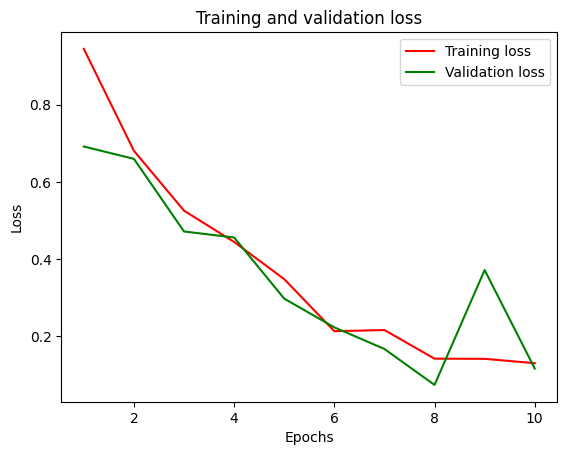

In [ ]:
import matplotlib.pyplot as plt
loss = hist.history['loss']
val_loss = hist.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, color='red', label='Training loss')
plt.plot(epochs, val_loss, color='green', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()






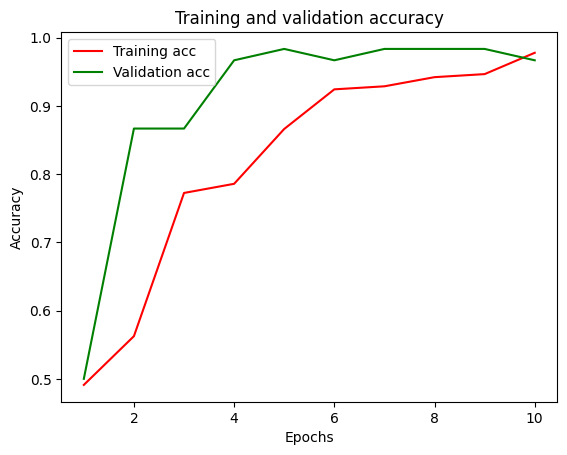

In [ ]:
acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy']
plt.plot(epochs, acc, color='red', label='Training acc')
plt.plot(epochs, val_acc, color='green', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


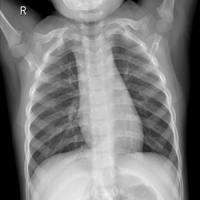

1/1 [==============================] - 0s 207ms/step
Radiologist: Normal
CNN Model: Normal


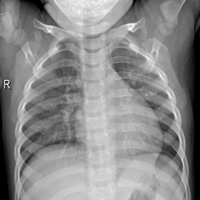

1/1 [==============================] - 0s 93ms/step
Radiologist: Normal
CNN Model: Normal


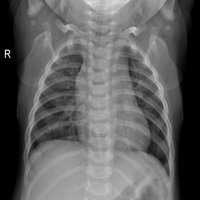

1/1 [==============================] - 0s 79ms/step
Radiologist: Normal
CNN Model: Normal


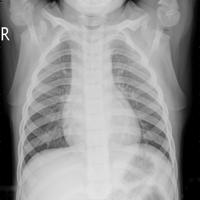

1/1 [==============================] - 0s 85ms/step
Radiologist: Normal
CNN Model: Normal


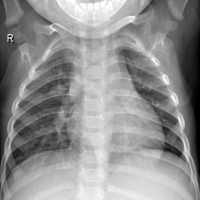

1/1 [==============================] - 0s 85ms/step
Radiologist: Normal
CNN Model: Normal


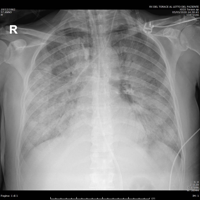

1/1 [==============================] - 0s 84ms/step
Radiologist: Cancer Detected
CNN Model: Cancer Detected


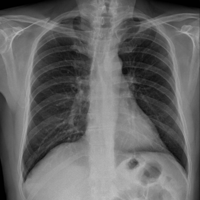

1/1 [==============================] - 0s 87ms/step
Radiologist: Cancer Detected
CNN Model: Cancer Detected


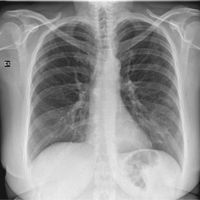

1/1 [==============================] - 0s 84ms/step
Radiologist: Cancer Detected
CNN Model: Cancer Detected


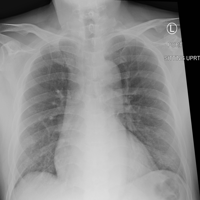

1/1 [==============================] - 0s 82ms/step
Radiologist: Cancer Detected
CNN Model: Cancer Detected


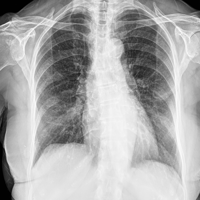

1/1 [==============================] - 0s 93ms/step
Radiologist: Cancer Detected
CNN Model: Cancer Detected


In [ ]:
class color:
  GREEN = '\033[92m'
  RED = '\033[91m'


from PIL import Image
j = 0
for i in os.listdir("/content/drive/My Drive/Dataset/Val/normal lung tissue/"):
  j = j+1
  pil_img = Image.open('/content/drive/My Drive/Dataset/Val/normal lung tissue/'+i)
  im = pil_img
  size = (200,200) #image size


#resize image
  out = im.resize(size)
  display(out)
  img = tf.keras.utils.load_img("/content/drive/My Drive/Dataset/Val/normal lung tissue/"+i, target_size = (224, 224))
  img = tf.keras.utils.img_to_array(img)
  img = np.expand_dims(img, axis=0)
  p = model.predict(img)
  print(color.GREEN + 'Radiologist: Normal' + color.GREEN)


  if p==0:
    print(color.RED + 'CNN Model: Cancer Detected' + color.RED)
  else:
    print("CNN Model: Normal")
  if (j==5):
    break
from PIL import Image
j = 0
for i in os.listdir("/content/drive/My Drive/Dataset/Val/cancer/"):
  j = j+1
  pil_img = Image.open('/content/drive/My Drive/Dataset/Val/cancer/'+i)
  im = pil_img
  size = (200,200) #image size


#resize image
  out = im.resize(size)
  display(out)
  img = tf.keras.utils.load_img("/content/drive/My Drive/Dataset/Val/cancer/"+i, target_size = (224, 224))
  img = tf.keras.utils.img_to_array(img)
  img = np.expand_dims(img, axis=0)
  p = model.predict(img)
  print(color.RED + 'Radiologist: Cancer Detected' + color.RED)
  if p==0:
    print("CNN Model: Cancer Detected")
  else:
    print(color.GREEN + 'Radiologist: Normal' + color.GREEN)
  if (j==5):
    break
